#Problema do dataset Iris

*Autor do Notebook: Fernando Filho*

Ele foi criado por Ronald Fisher em 1936 e contém 150 amostras de flores da espécie Iris, divididas igualmente em três classes:

*   Iris setosa
*   Iris versicolor
*   Iris virginica

Cada amostra tem quatro atributos (features):



1.   Comprimento da sépala (sepal length)

1.   Largura da sépala (sepal width)
2.   Comprimento da pétala (petal length)


2.   Largura da pétala (petal width)

#Importação das bibliotecas

In [ ]:
#Importação do dataset diretamente pelo Pandas
from sklearn.datasets import load_iris
#Importação do pandas como pd para trabalhar com dados
import pandas as pd
#Importação do numpy como np para trabalhar com vetores
import numpy as np
#Importações p/ trabalhar com gráficos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sbn
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
#Machine Learning
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
iris = load_iris()
Dados = pd.DataFrame(iris.data, columns=iris.feature_names)
Dados["classe"] = iris.target
Dados.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classe
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#Tratamento de dados

In [ ]:
#Verificar se há dados faltantes
Dados.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
classe,0


In [ ]:
#Verificar os tipos das variaveis nas features
Dados.dtypes

,0
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64
classe,int64


In [ ]:
Dados.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classe
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


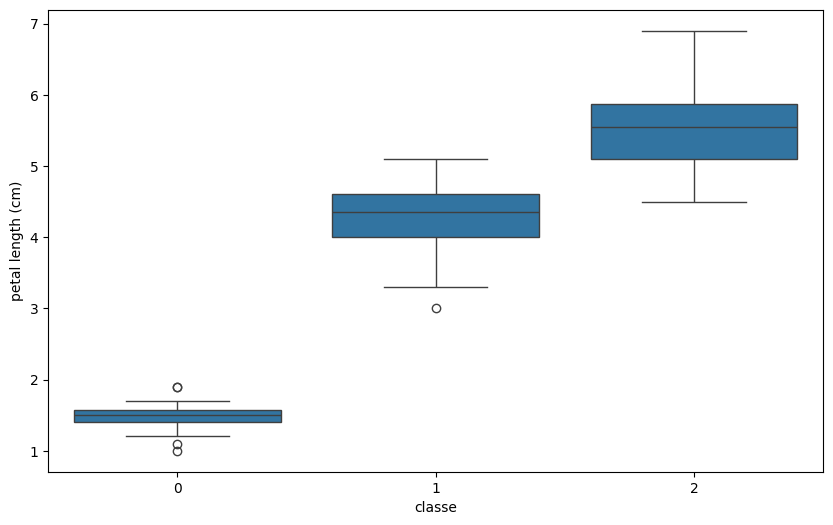

In [ ]:
# Boxplot
plt.figure(figsize=(10,6))
sbn.boxplot(x="classe", y="petal length (cm)", data=Dados)
plt.show()

Esse boxplot mostra a distribuição do comprimento da pétala (petal length) para cada uma das três classes de flores (Iris setosa, Iris versicolor e Iris virginica).

**Como interpretar o gráfico:**

Cada caixa representa a distribuição dos dados dentro do intervalo interquartil (IQR, entre o 1º e o 3º quartil, ou seja, onde está 50% dos dados).



*   A linha dentro da caixa representa a mediana (valor central da distribuição).
*   Os "bigodes" indicam a faixa de valores que não são considerados outliers.
*   Os pontos fora dos bigodes são outliers, indicando valores atípicos.

**Principais conclusões:**

Iris setosa (classe **0**) tem pétalas curtas e bem separadas das outras espécies. Sua distribuição é bem compacta, mas há alguns outliers abaixo de 1.2 cm.

Iris versicolor (classe **1**) tem um intervalo maior de tamanhos de pétala, variando aproximadamente entre 3 cm e 5 cm, com um leve outlier abaixo de 3 cm.

Iris virginica (classe **2**) tem pétalas mais longas, com um intervalo que vai de cerca de 4.5 cm até 7 cm.

💡 **Conclusão:**

O comprimento da pétala (petal length) é uma característica muito forte para diferenciar as classes.** A Iris setosa se distingue completamente das outras, enquanto Iris versicolor e Iris virginica possuem alguma sobreposição, mas ainda são distinguíveis**.

#Análise de dados

Mapa de correlações

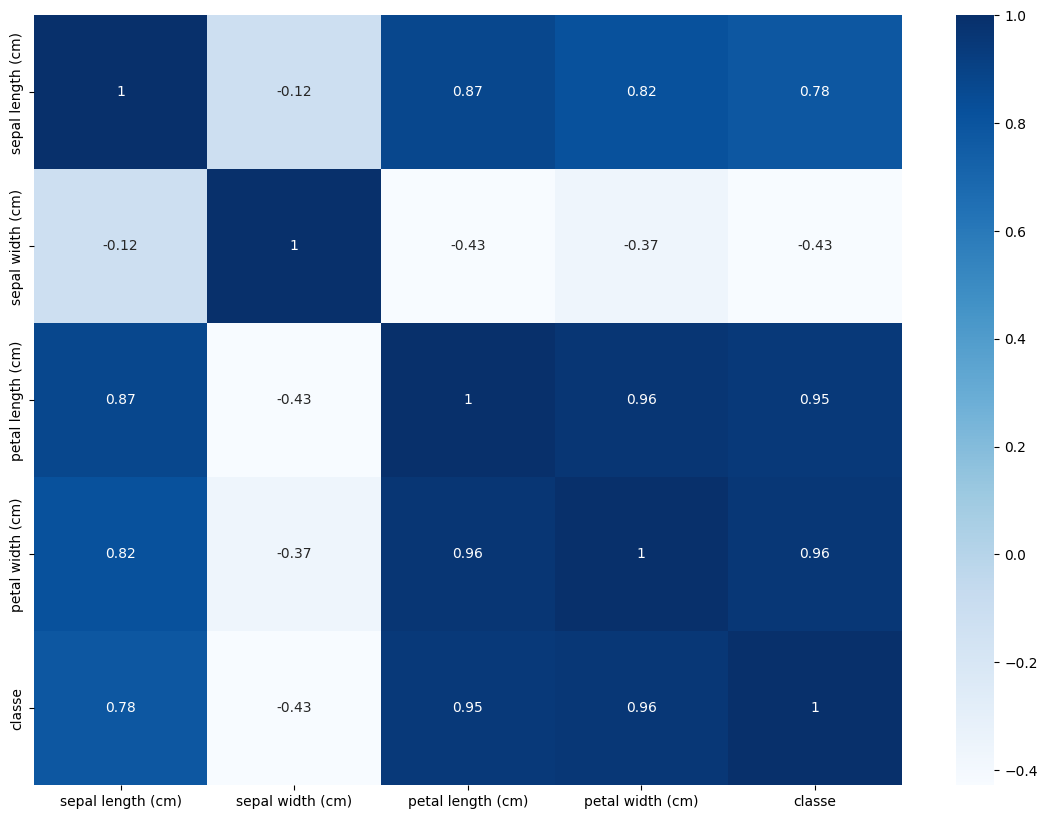

In [ ]:
plt.figure(figsize=(14,10))
sbn.heatmap(Dados.corr(),annot = True, cmap = "Blues")
plt.show()

*   A maior correlação é entre petal length e petal width (0.96), indicando que essas variáveis crescem juntas.
*   Sepal width tem uma correlação mais fraca com as outras variáveis, o que sugere que pode ser menos relevante para a classificação.
*   A classe tem alta correlação com petal length e petal width, reforçando a ideia de que essas variáveis são mais úteis para classificar as flores.

💡 Conclusão: Se fosse necessário reduzir a dimensionalidade do dataset, poderíamos considerar descartar sepal width.

Pairplot

<Figure size 1400x1000 with 0 Axes>

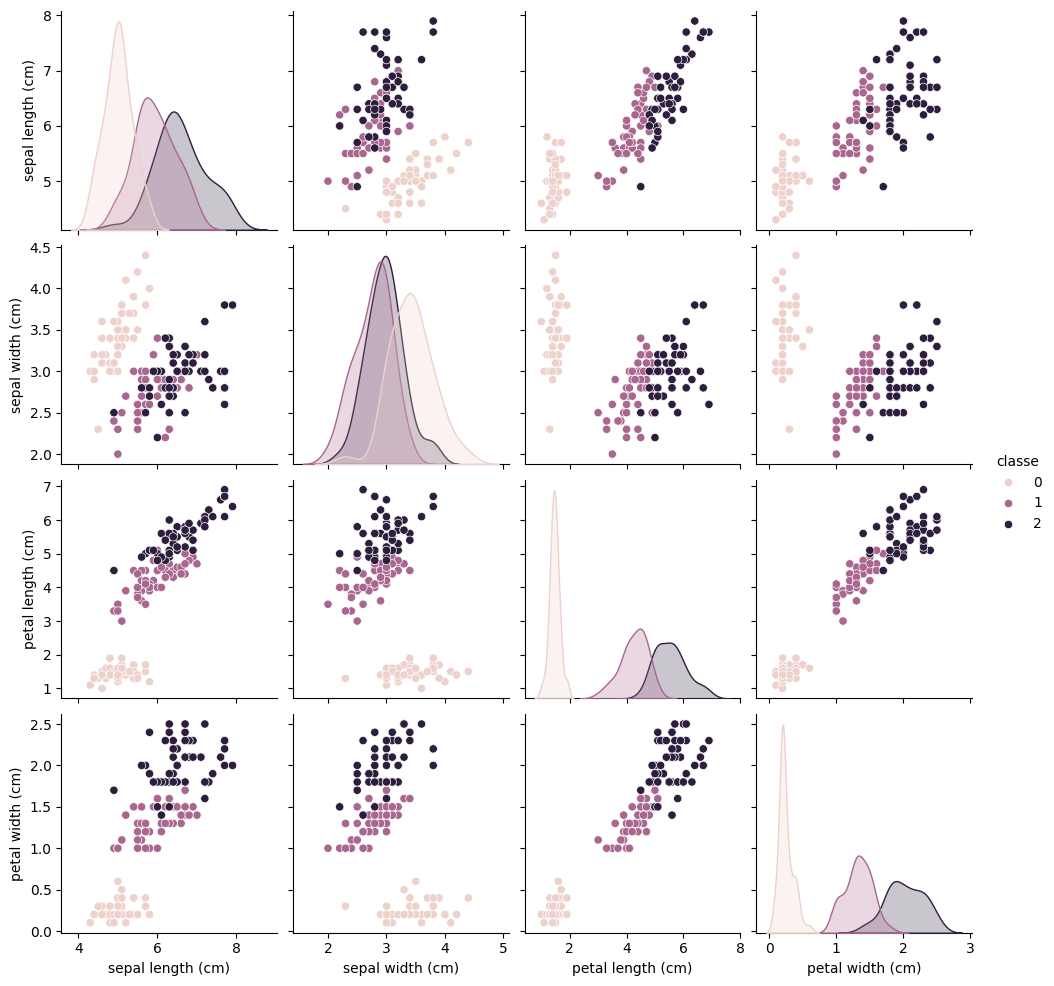

In [ ]:
plt.figure(figsize=(14,10))
sbn.pairplot(Dados, hue="classe")
plt.show()

Scatterplot (petal length x petal width)

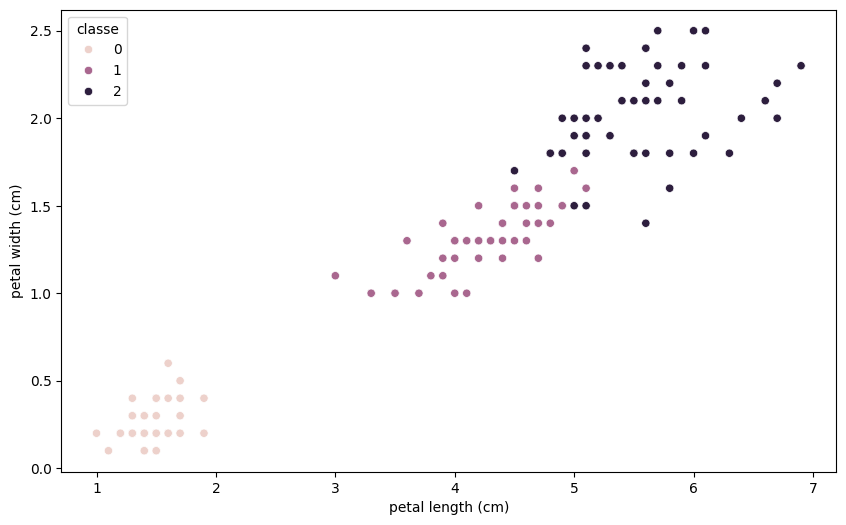

In [ ]:
plt.figure(figsize=(10,6))
sbn.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="classe", data=Dados)
plt.show()

Scatterplot (sepal length (cm) x sepal width (cm))

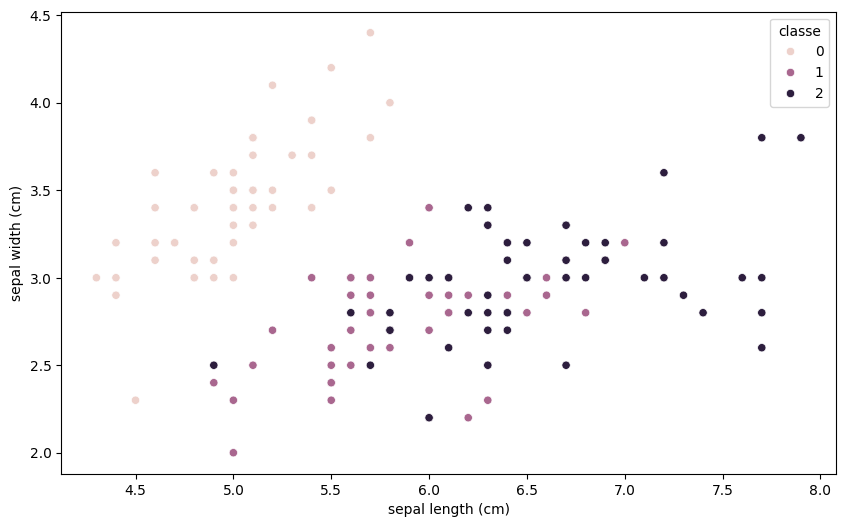

In [ ]:
plt.figure(figsize=((10,6)))
sbn.scatterplot(x="sepal length (cm)", y="sepal width (cm)", hue="classe", data=Dados)
plt.show()

Note que as características das **pétalas** são mais informativas para diferenciar as classes do que as características das **sépalas**, uma vez que com **sepal length vs. sepal width**, percebe-se que as classes não são tão bem separadas, principalmente entre Iris versicolor (classe 1) e Iris virginica (classe 2). Já com **petal length vs. petal width**, a separação das classes é bem mais nítida, especialmente da Iris setosa (classe 0), que está completamente isolada.

3D Scatter Plot

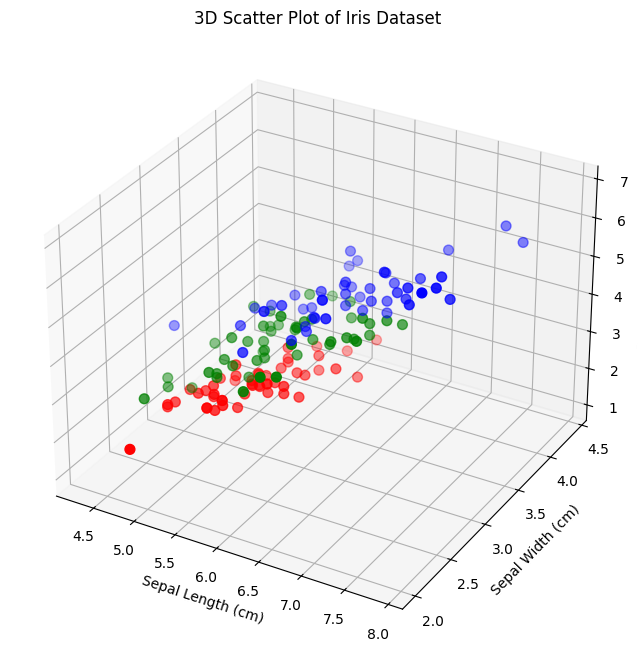

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

targets = [0, 1, 2]
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = Dados['classe'] == target
    ax.scatter(Dados.loc[indicesToKeep, 'sepal length (cm)'],
               Dados.loc[indicesToKeep, 'sepal width (cm)'],
               Dados.loc[indicesToKeep, 'petal length (cm)'],
               c=color, s=50)

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.set_title('3D Scatter Plot of Iris Dataset')
plt.show()

Andrews Curves

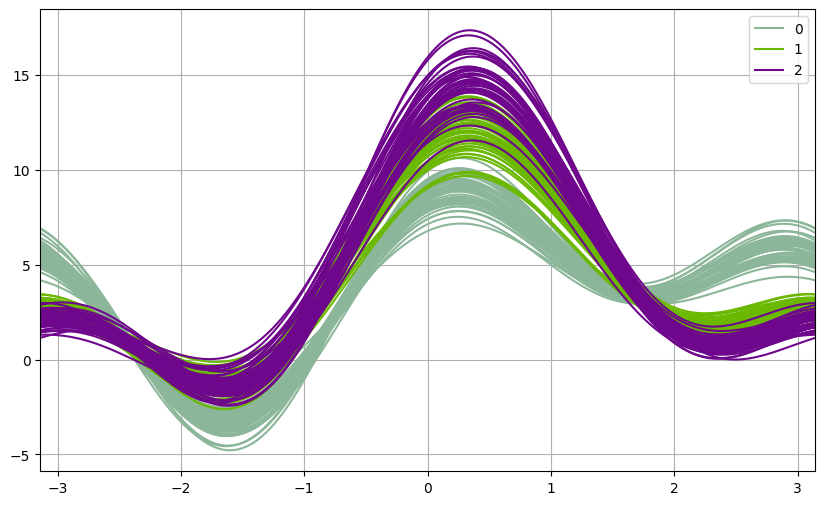

In [ ]:
plt.figure(figsize=(10,6))
andrews_curves(Dados, 'classe')
plt.show()

🔍 O que esse gráfico mostra?
Cada linha representa um ponto de dados do conjunto Iris.

As classes (0, 1, 2) são codificadas por cores distintas.

As curvas mostram a similaridade entre amostras da mesma classe.

Se as curvas de uma classe estão agrupadas e distantes das outras, isso indica que os dados dessa classe são distintos e podem ser separados por um modelo de Machine Learning.

📌 Conclusões possíveis a partir do gráfico:
As classes 0, 1 e 2 têm comportamentos diferentes e tendem a formar grupos, o que sugere que a separação entre elas é possível.

Se houver sobreposição significativa, significa que os atributos podem não ser suficientemente distintos para separar as classes com facilidade.

O método pode ajudar a identificar padrões ocultos ou a necessidade de aplicar técnicas como PCA (Análise de Componentes Principais) para melhor visualização.

Parallel Coordinates

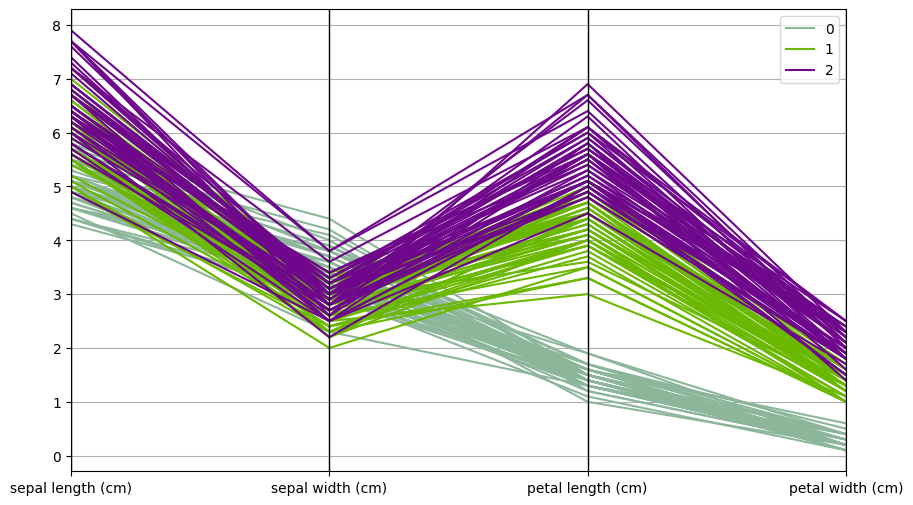

In [ ]:
plt.figure(figsize=(10,6))
parallel_coordinates(Dados, 'classe')
plt.show()

O Parallel Coordinates (Coordenadas Paralelas) é uma técnica de visualização de dados multivariados onde cada variável é representada por um eixo vertical e cada observação é traçada como uma linha que conecta esses eixos.

🔍 O que esse gráfico representa?
As quatro características do conjunto Iris (comprimento e largura das sépalas e pétalas) são exibidas ao longo dos eixos verticais.

Cada linha representa uma amostra, e a cor indica a classe da flor (0, 1 ou 2).

A estrutura das linhas mostra como as características variam entre as classes.

📌 Principais insights:
Separabilidade das classes

A classe 0 (verde-claro) tem padrões bem distintos, com valores menores para "petal length" e "petal width".

As classes 1 (verde) e 2 (roxo) possuem algumas sobreposições, mas diferem principalmente nos valores das pétalas.

Identificação de padrões

As linhas convergindo ou divergindo em certos pontos mostram quais características têm maior variação entre as classes.

**"Petal length" e "Petal width" parecem ser os melhores atributos para distinguir as classes.**

#Machine Learning

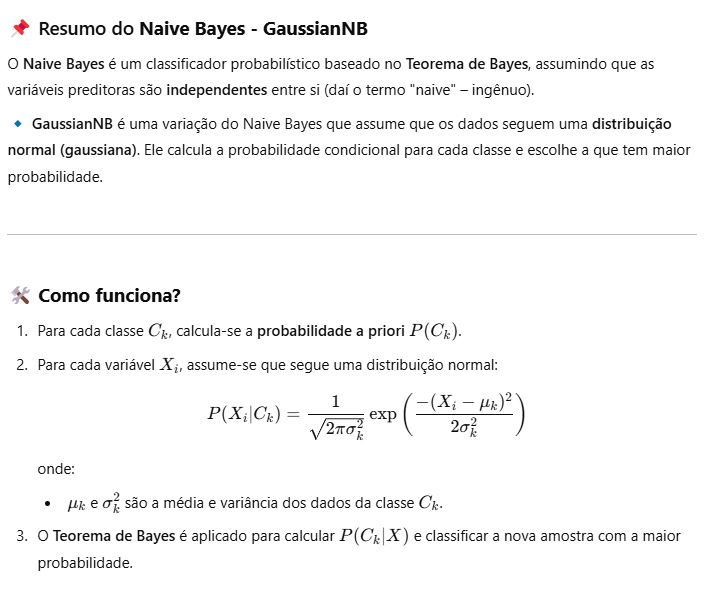

Train test split

In [ ]:
# x= apenas features
x = Dados.drop(["classe"], axis = 1)
# y = apenas variável target
y = Dados["classe"]
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 9)

Naive Bayes (GaussianNB)

In [ ]:
GNB = GaussianNB()
# Treinamento
GNB.fit(x_train, y_train)

GaussianNB()

Predição

In [ ]:
#Predições
y_pred = GNB.predict(x_test)

1.0


Métricas

In [ ]:
#Acurácia
acuracia = accuracy_score(y_test, y_pred)
print(acuracia)

1.0


In [ ]:
#Classificação - Report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        14

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



 **Uma acurácia de 100%!** Isso tem tudo a ver com o fato de que cada variável no conjunto Iris tem uma distribuição que se aproxima bem de uma distribuição normal (gaussiana) dentro de cada classe.

O modelo GaussianNB funciona bem quando os dados seguem distribuições normais, pois ele calcula a probabilidade de uma amostra pertencer a uma classe com base na função de densidade da normal. Se os dados realmente tiverem essa característica, o modelo pode alcançar bons resultados, mesmo que a hipótese de independência entre variáveis seja violada.

<Figure size 1000x600 with 0 Axes>

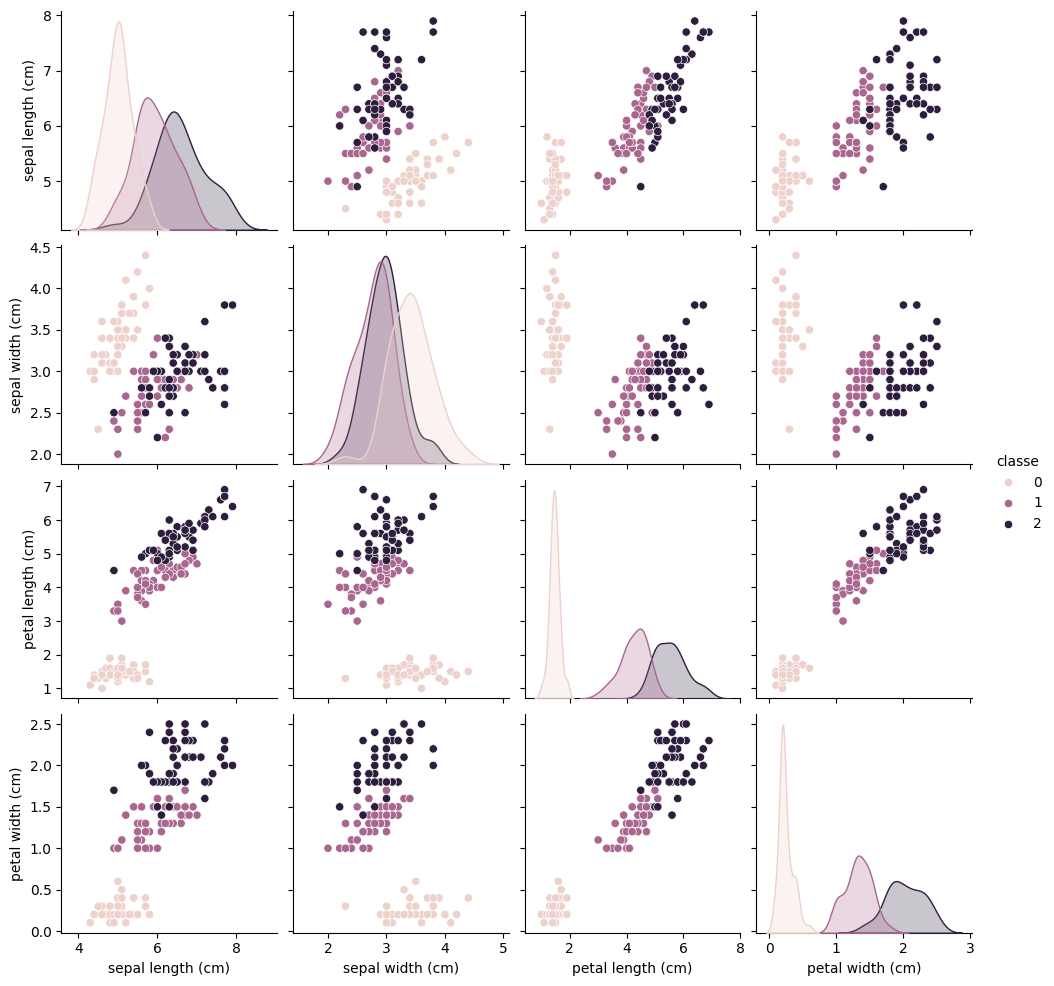

In [ ]:
#Veja:
plt.figure(figsize=(10,6))
sbn.pairplot(Dados, hue = "classe")
plt.show()

Matriz confusão

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[20  0  0]
 [ 0 16  0]
 [ 0  0 14]]


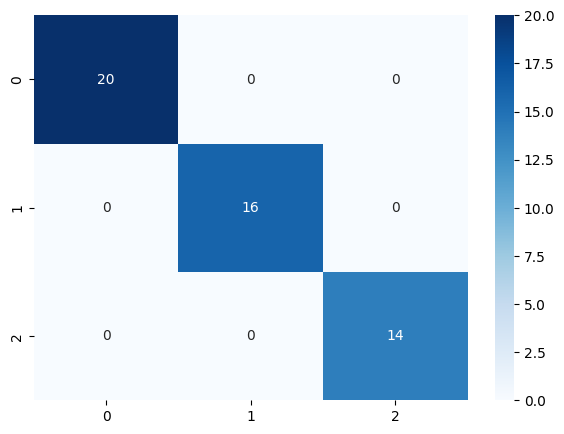

In [ ]:
plt.figure(figsize = (7,5))
sbn.heatmap(matrix, annot = True, vmin = 0,vmax = 20, fmt = "g", cmap = "Blues")
plt.show()

# Validação e testes

Exemplo 1 - Deve ser Setosa (classe 0)
[5.1, 3.5, 1.4, 0.2]

Exemplo 2 - Deve ser Versicolor (classe 1)
[6.0, 2.2, 4.0, 1.0]

Exemplo 3 - Deve ser Virginica (classe 2)
[6.5, 3.0, 5.5, 2.0]

In [ ]:
testes = [
    [5.1, 3.5, 1.4, 0.2],  # esperado: setosa
    [6.0, 2.2, 4.0, 1.0],  # esperado: versicolor
    [6.5, 3.0, 5.5, 2.0]   # esperado: virginica
]

# Fazendo a previsão
predicoes = GNB.predict(testes)
#Printando os resultados
for i, pred in enumerate(predicoes):
    print(f"Exemplo {i+1}: {iris.target_names[pred]}")

Exemplo 1: setosa
Exemplo 2: versicolor
Exemplo 3: virginica


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Perfeito!